In [1]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pylab as pylab

# Some warnings will occur. lets suppress them
import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading shopMart trasaction data into a pandas dataframe
shopMart_DF = pd.read_csv('C:/Users/caleb.moore/Desktop/ShopMart_Project/2021_Shop_Mart_Data_Clean.csv')

In [3]:
# loading income per capita data from from bea.gov into a pandas dataframe
income_DF = pd.read_csv('C:/Users/caleb.moore/Desktop/ShopMart_Project/2020_Income_Data_Clean.csv')

In [4]:
# exploring shopMart dataframe
shopMart_DF.head()

,ship_city_state,transaction_count,sum_trans_amount,avg_trans_amount
0,"irvine, ca",948,927698.29,978.58
1,"katy, tx",276,240651.82,871.93
2,"littleton, co",298,268656.77,901.53
3,"los angeles, ca",3276,3004829.09,917.22
4,"novi, mi",72,65742.28,913.09


In [5]:
# exploring income dataframe
income_DF.head()

,city_state,income_avg
0,"autauga, al",46814
1,"baldwin, al",50953
2,"barbour, al",37850
3,"bibb, al",34300
4,"blount, al",38808


In [6]:
# I performed an inner join to preserve only those rows that contain BOTH income dats AND transaction data.
# Rows without both pieces of data would have been useless to the analysis.
df3 = income_DF.merge(shopMart_DF, left_on='city_state', right_on='ship_city_state', how='inner')

# Deleting duplicate column due to merge
del df3['ship_city_state']

In [7]:
# exploring new combined dataframe, sorted by income descending, displaying top 5
df3.sort_values(by='income_avg', ascending=False).head(5)

,city_state,income_avg,transaction_count,sum_trans_amount,avg_trans_amount
273,"new york, ny",191220,5118,4579650.39,894.81
36,"san francisco, ca",144818,4418,3555390.97,804.75
38,"san mateo, ca",141841,410,326843.77,797.18
432,"midland, tx",126631,75,103739.27,1383.19
40,"santa clara, ca",123661,547,430122.57,786.33


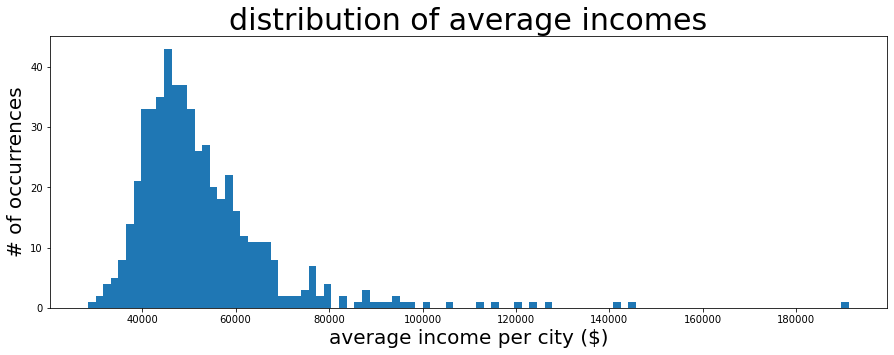

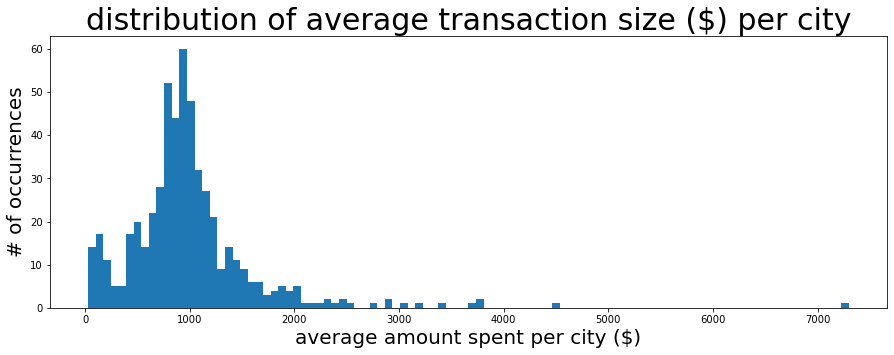

In [8]:
# reviewing distribution of income amounts per city
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(15)
plt.title('distribution of average incomes', FontSize='30')
plt.xlabel('average income per city ($)', FontSize='20')
plt.ylabel('# of occurrences', FontSize='20')
plt.hist(df3['income_avg'], bins=100)
plt.show()

# reviewing distribution of average transaction size ($) per city
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(15)
plt.title('distribution of average transaction size ($) per city', FontSize='30')
plt.xlabel('average amount spent per city ($)', FontSize='20')
plt.ylabel('# of occurrences', FontSize='20')
plt.hist(df3['avg_trans_amount'], bins=100)
plt.show()

In [9]:
# Important distribution facts
print(f"The average reported income in the US is: ${round(df3['income_avg'].mean())}")
print(f"The average transaction amount in the US is: ${round(df3['avg_trans_amount'].mean())}")

The average reported income in the US is: $52932
The average transaction amount in the US is: $986


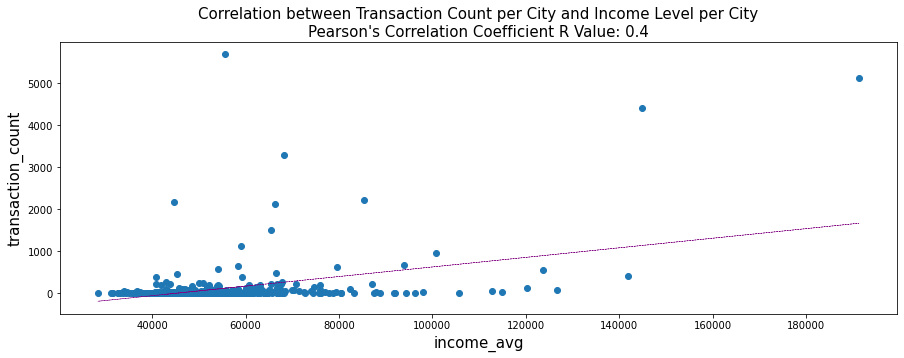

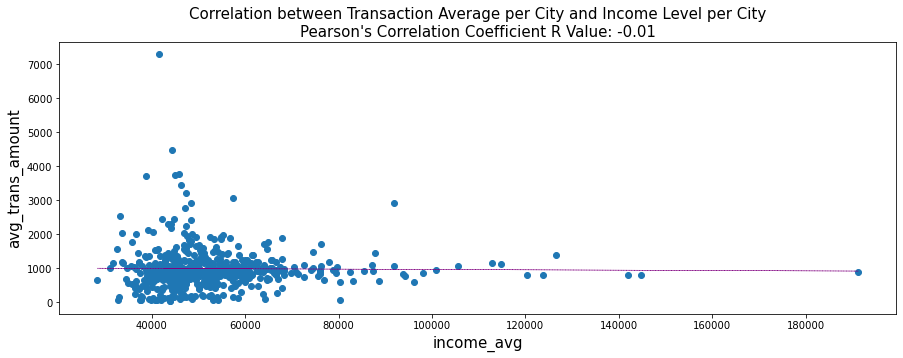

In [10]:
# Scatter plot between income per capita and number of transactions per city
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(15)
x = df3['income_avg']
plt.xlabel("income_avg", FontSize='15')
y = df3['transaction_count']
plt.ylabel("transaction_count", FontSize='15')
plt.scatter(x,y)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), color='purple', linewidth=.5, linestyle="--")
r = np.corrcoef(x, y)[0,1]
plt.title('Correlation between Transaction Count per City and Income Level per City\n'\
          'Pearson\'s Correlation Coefficient R Value: '+str(round(r,2)), FontSize='15')
plt.show()

# Scatter plot between income per capita and average transaction amounts per city
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(15)
x = df3['income_avg']
plt.xlabel("income_avg", FontSize='15')
y = df3['avg_trans_amount']
plt.ylabel("avg_trans_amount", FontSize='15')
plt.scatter(x,y)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), color='purple', linewidth=.5, linestyle="--")
r = np.corrcoef(x, y)[0,1]
plt.title('Correlation between Transaction Average per City and Income Level per City\n'\
          'Pearson\'s Correlation Coefficient R Value: '+str(round(r,2)), FontSize='15')
plt.show()

# Observations:

1. The average income level in the US (per the 2020 BEA income data) is 52931.
2. The average transaction amount for ShopMart in 2021 was 986.
3. The correlation between Transaction Count per City and Income Level per City is positive and moderate (r=.4).
4. The correlation between Average Transaction Total per City and Income Level per City is negative and very weak (r=-.01).
